In [642]:
import pandas as pd 
import matplotlib.pyplot as plt
import re
from symspellpy import SymSpell, Verbosity
import numpy as np

In [643]:
df = pd.read_csv("data/noon_perfumes_dataset.csv", index_col=0)

to do: 

- one hot encoding of notes and scents
    - req: string splitting and removal of words like "and"

- check correlation between ratings and price?
    - seller rating == rating of seller, not seller's rating of item
        - some incorrect scrapings (ranges between 0-500) because the number of ratings has been mistaken for value of ratings in some cases
        
- Check correlation between ingredients (scents/notes) and price?

In [644]:
old_prices = df.old_price
new_prices = df.new_price
ml = df.ml

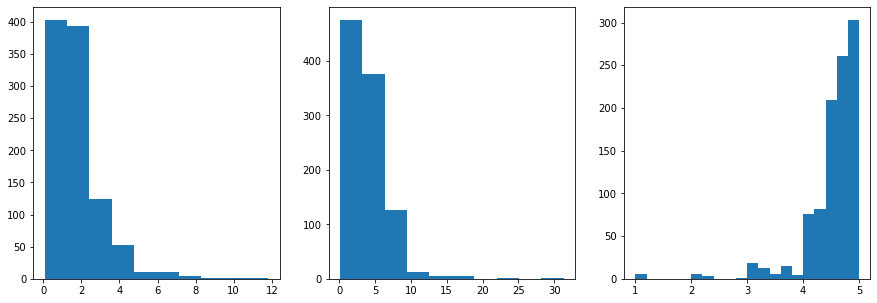

In [645]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(x=new_prices/ml); ax[1].hist(x=old_prices/ml); ax[2].hist(df.item_rating, bins=20);

In [646]:
notes = df[['base_note', 'middle_note']].values

In [719]:
def text_clean(text_array):
    text_list = []
    for text_pair in text_array:
        text = ", ".join(text_pair).lower().replace(" and", ",") #join base_note and middle_note strings, lowercase everything and replace "and" with a comma
        text = re.sub(r"\b\,\b", ", ", text)
        text = re.sub(r"\b\s\b|\B\,|of |the |-", "", text)
        text_list.append(text)
        #text_list.append(text.split(", ")) #split at commas (this way we preserve notes desribed by > 1 word)
    return text_list

In [720]:
sent_dic = text_clean(notes)
sent_dic[10:30]

['musk, sandalwood, patchouli, oakmoss, cedar, pepper, pinetree, vetiver, ylangylang, rose, lilyofthevalley, cassia',
 'whitemusk, vetiver, cedar, cacaopod',
 'delicatemuskysensualwoods, distinct, exotic',
 'mandarinorange, agarwood, musk, patchouli',
 'tonkabean, tahitianvetiver, cedar, spices, whitepepper, basil, violetleaf',
 'musk, cedar, cashmirwood, patchouli, orangeblossom, stephanotis, rose, blackcurrant, peach',
 'cedarwood, tonkabeans, vetiver, musk',
 'amber, musk, sandalwood, coumarin, vanilla, pinkpepper, cardomon, cinnamon, jasmin, cumin, redfruits, lily, nutmeg',
 'amber, musk, powderynotes, cedar, sandalwood, rose, jasmine',
 'goldenwoodsmusk, sambacjasmineabsolute, roseabsolute',
 'patchouli, sandalwood, amber, musk',
 'rarewood, amberfat, whitemusk, shepherd, saffron, teakwood, gaiakwood',
 'sandalwood, cedarwood, vanilla, caramelmusk, woodyaccords, jasmine, rose, muget, freesia, cinnamon',
 'sandalwood, tonkabean, amber, patchouli, musk, oakmoss, cedar, tobacco, pine

In [721]:
cashmere_list = []
for sent in sent_dic:   
    for word in sent.split(", "):
        if "cash" in word:
            cashmere_list.append(word)

In [722]:
x, y = np.unique(cashmere_list, return_counts=True)
print(len(x), sum(y))

10 77


In [723]:
sym_spell = SymSpell(max_dictionary_edit_distance=2, count_threshold=5)
sym_spell.create_dictionary(sent_dic)
#suggestions = sym_spell.lookup_compound(", ".join(sent_dic).replace(",", ""), max_edit_distance=2)

True

In [791]:
sent_dic_autocorrected = []
for sent in sent_dic:
    s = str()
    for word in sent.split(", "):
        suggestions = sym_spell.lookup(word, verbosity=Verbosity.ALL, max_edit_distance=2)
        if suggestions:
            word = suggestions[np.argmax([sug.count for sug in suggestions])].term
        s += word+" "
    sent_dic_autocorrected.append(s)


In [792]:
cashmere_list_v2 = []
for sent in sent_dic_autocorrected:   
    for word in sent.split(" "):
        if "cash" in word:
            cashmere_list_v2.append(word)

In [793]:
x, y = np.unique(cashmere_list_v2, return_counts=True)
print(len(x), sum(y)) #Without losing tokens, the amount of unique types have been reduced from 10 --> 5

5 77
